In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = '/content/drive/MyDrive/data/airline'
os.chdir(path)
sns.color_palette("Set2")

train = pd.read_csv('train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

- null값은 없는듯하다

In [ ]:
train.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
5,6,Female,Loyal Customer,42,Business travel,Business,1780,4,4,4,4,3,3,4,5,5,4,5,3,5,4,0,0.0,1
6,7,Female,disloyal Customer,20,Business travel,Eco,2980,3,3,3,4,5,3,5,5,1,5,3,1,4,5,12,34.0,0
7,8,Male,Loyal Customer,38,Business travel,Eco,1386,4,3,3,3,4,4,4,4,1,2,2,1,5,4,0,0.0,1
8,9,Female,Loyal Customer,51,Business travel,Business,2346,2,2,2,2,3,4,5,3,3,3,3,3,3,3,0,0.0,1
9,10,Male,Loyal Customer,8,Personal Travel,Eco,1336,2,5,2,5,5,2,5,5,5,5,5,4,5,5,0,0.0,0


- target을 맞춰야하는데 0, 1 인 이진분류인듯하다.

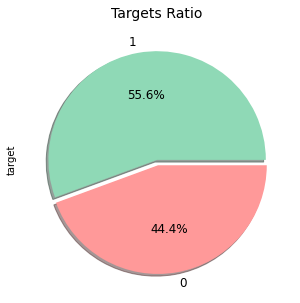

In [ ]:
colors = ['#8fd9b6', '#ff9999']

plt.subplots(figsize = (5,5))
train['target'].value_counts(normalize = True).plot(kind = 'pie', 
                                                    autopct = '%.1f%%', 
                                                    fontsize = 12, 
                                                    explode = [0, 0.05], 
                                                    shadow = True, 
                                                    colors = colors)
plt.title('Targets Ratio', fontsize = 14)
plt.show()

- target에 약간의 불균형이 있는듯 하지만 심하지는 않아 보인다. 그냥 진행해도 무방하겠다.

In [ ]:
print('Genger Unique is', train['Gender'].unique())

train['Gender'].value_counts()

Genger Unique is ['Female' 'Male']


Male      1502
Female    1498
Name: Gender, dtype: int64

- 설문의 대상, 즉 성별이 하나로 치우쳐지지 않은 듯 하다.

In [ ]:
train.groupby(['Gender'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1498.0,0.67223,0.469557,0.0,0.0,1.0,1.0,1.0
Male,1502.0,0.44008,0.496562,0.0,0.0,0.0,1.0,1.0


- 주로 여성분들이 만족한다고 응답했다. 평균치로 봤을때 약 67%정도의 여성이 만족으로 응답했고 약 44%의 남성이 만족한다고 응답했다.

In [ ]:
print('Customer Type is', train['Customer Type'].unique())

train['Customer Type'].value_counts()

Customer Type is ['disloyal Customer' 'Loyal Customer']


Loyal Customer       2489
disloyal Customer     511
Name: Customer Type, dtype: int64

- loyal customer가 많다. loyal인 사람들의 의견이 많이 설문에 반영되었을 것 같다.

In [ ]:
train.groupby(['Customer Type'])['target'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Type,,,,,,,,
Loyal Customer,2489.0,0.617115,0.486188,0.0,0.0,1.0,1.0,1.0
disloyal Customer,511.0,0.258317,0.438138,0.0,0.0,0.0,1.0,1.0


- 역시 loyal customer의 경우 약 61%를 만족한다고 했고 disloyal customer의 경우 약 25%만 만족한다고 했다. 
- 특정계층이 많으므로 조금의 분석이 필요한것 같다.

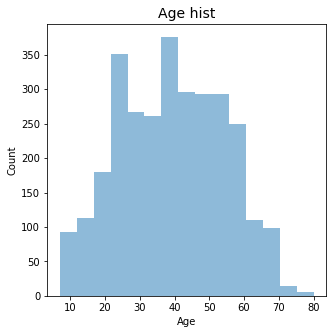

In [ ]:
f, ax = plt.subplots(figsize = (5,5))
plt.hist(train['Age'], bins = 15, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age hist', fontsize = 14)

plt.show()

- 나이는 정규분포랑 비슷한 모양을 띄고 있다.

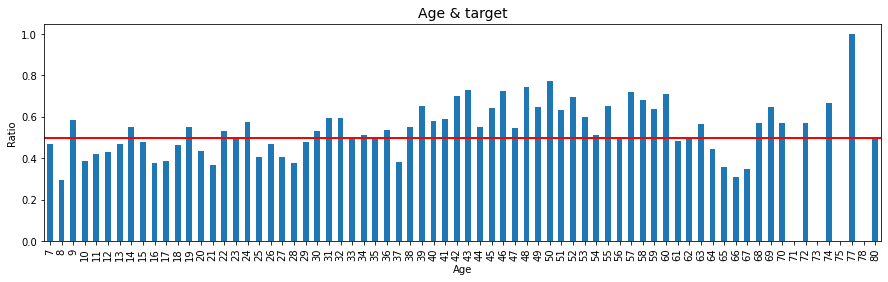

In [ ]:
f, ax = plt.subplots(figsize = (15,4))

train.groupby(['Age'])['target'].mean().plot(kind = 'bar')
plt.ylabel('Ratio')
plt.axhline(y= 0.5 , color = 'r', linewidth = 2)
plt.title('Age & target', fontsize = 14)
plt.show()

- age와 target의 ratio를 보려고 한다. 빨간선은 0.5를 기준으로 잡은것으로 7세부터 30대 후반까지는 0.5를 넘는 연령이 많지 않지만 40대부터 50대 후반까지는 0.5가 넘는 연령이 많다.

- age를 연속형으로 써도 되겠지만 이산형으로 바꿔서 10대 20대 이런식으로 써도 괜찮을 듯하다.

In [ ]:
print('Type of Travel Value_counts','\n',
      train['Type of Travel'].value_counts(normalize = True),'\n')
print('Type of Travel & Target','\n',
      train.groupby(['Type of Travel'])['target'].mean())

Type of Travel Value_counts 
 Business travel    0.684333
Personal Travel    0.315667
Name: Type of Travel, dtype: float64 

Type of Travel & Target 
 Type of Travel
Business travel    0.601072
Personal Travel    0.458289
Name: target, dtype: float64


In [ ]:
train.groupby(['target'])['Flight Distance'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,1332.0,2042.963213,882.121266,63.0,1524.5,1978.5,2481.25,6882.0
1,1668.0,1935.258393,1129.225482,52.0,1061.0,1868.5,2654.00,6232.0


- 크게 차이나보이지는 않다. 

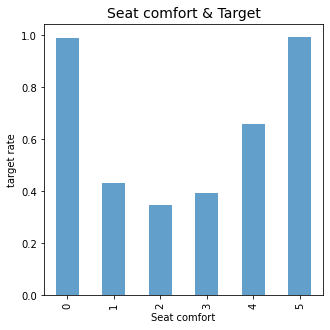

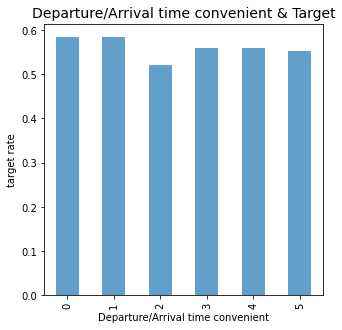

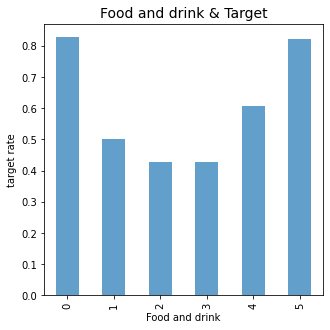

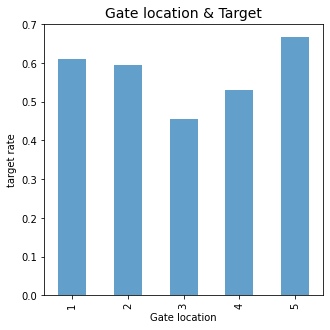

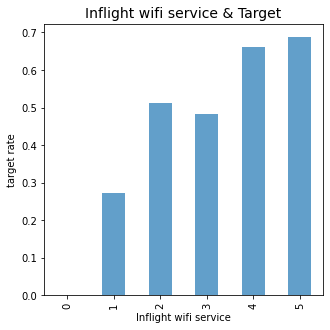

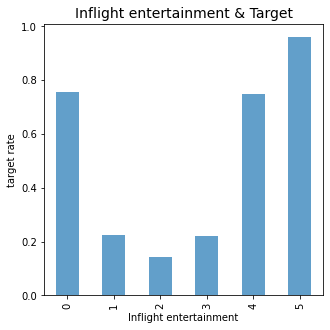

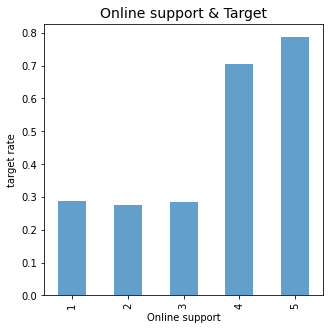

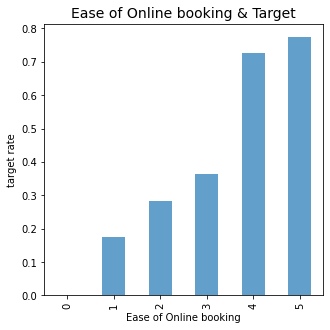

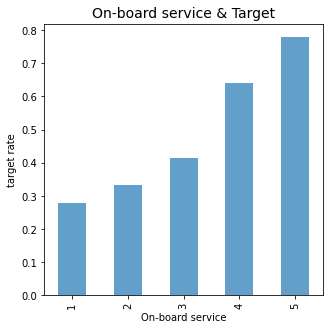

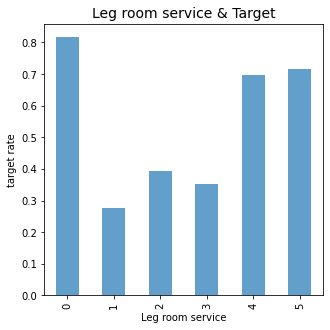

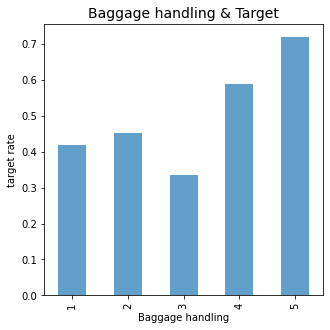

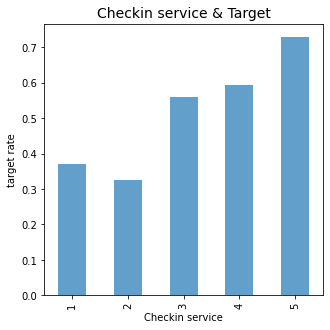

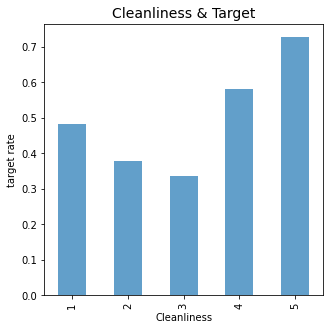

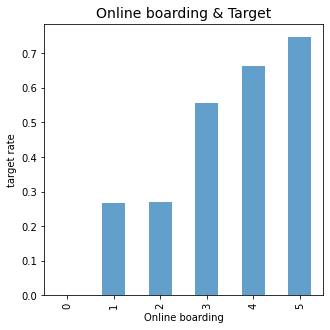

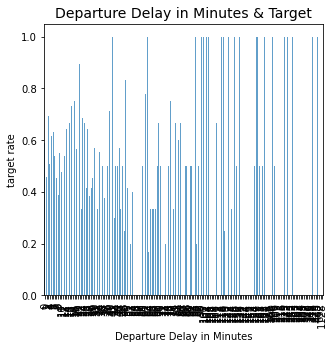

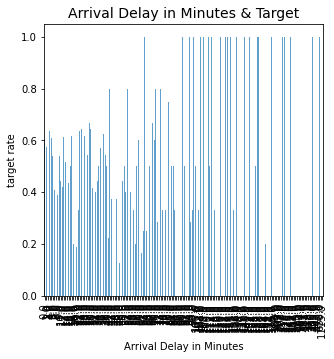

In [ ]:
column_list = train.columns[7:-1]
def plotting(column_list):

  plt.subplots(figsize = (5, 5))

  train.groupby([column_list])['target'].mean().plot(kind = 'bar', alpha = 0.7)
  plt.ylabel('target rate')
  plt.title(str(column_list)+ ' & Target', fontsize = 14)
  plt.show()

for i in column_list:
  plotting(i)

In [ ]:
train['Departure Delay in Minutes'].describe()

count    3000.000000
mean       15.634333
std        45.083228
min         0.000000
25%         0.000000
50%         0.000000
75%        12.000000
max      1128.000000
Name: Departure Delay in Minutes, dtype: float64

In [ ]:
train.groupby(['target'])['Departure Delay in Minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,1332.0,20.929429,57.729423,0.0,0.0,0.0,18.0,1128.0
1,1668.0,11.405875,30.907919,0.0,0.0,0.0,9.0,435.0


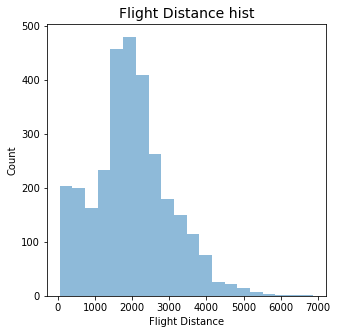

In [ ]:
f, ax = plt.subplots(figsize = (5,5))
plt.hist(train['Flight Distance'], bins = 20, alpha = 0.5)
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title('Flight Distance hist', fontsize = 14)

plt.show()

In [ ]:
train.groupby(['target'])['Flight Distance'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,1332.0,2042.963213,882.121266,63.0,1524.5,1978.5,2481.25,6882.0
1,1668.0,1935.258393,1129.225482,52.0,1061.0,1868.5,2654.00,6232.0


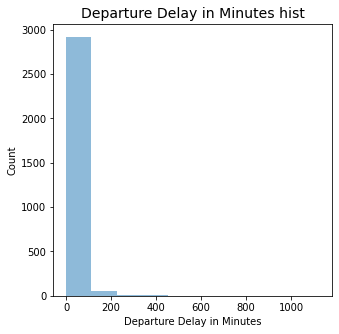

In [ ]:
f, ax = plt.subplots(figsize = (5,5))
plt.hist(train['Departure Delay in Minutes'], bins = 10, alpha = 0.5)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Count')
plt.title('Departure Delay in Minutes hist', fontsize = 14)

plt.show()

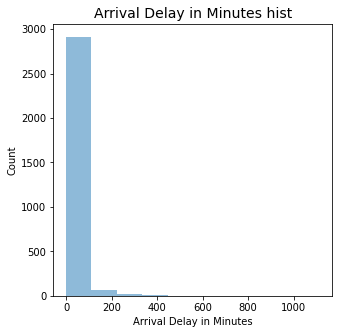

In [ ]:
f, ax = plt.subplots(figsize = (5,5))
plt.hist(train['Arrival Delay in Minutes'], bins = 10, alpha = 0.5)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Count')
plt.title('Arrival Delay in Minutes hist', fontsize = 14)

plt.show()

In [ ]:
train['minus'] = train['Departure Delay in Minutes']-train['Arrival Delay in Minutes']
train.groupby(['target'])['minus'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,1332.0,-0.674174,10.934151,-104.0,-1.0,0.0,3.0,35.0
1,1668.0,0.020983,8.598359,-98.0,0.0,0.0,2.0,40.0


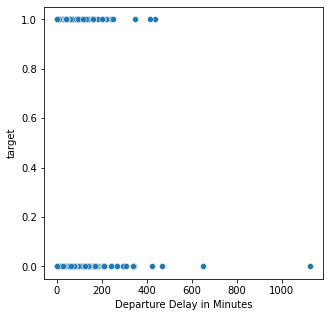

In [ ]:
plt.subplots(figsize = (5,5))

sns.scatterplot(x = train['Departure Delay in Minutes'], y = train['target'])
plt.show()

In [ ]:
train[train['Departure Delay in Minutes']>=200]['target'].value_counts(normalize = True)

0    0.727273
1    0.272727
Name: target, dtype: float64

In [ ]:
M = list(range(-10,45,5))
for i in M:

  print('minus & target minus : '+ str(i),'\n',train[train['minus']>=i]['target'].value_counts(normalize = True))

minus & target minus : -10 
 1    0.564855
0    0.435145
Name: target, dtype: float64
minus & target minus : -5 
 1    0.575369
0    0.424631
Name: target, dtype: float64
minus & target minus : 0 
 1    0.576346
0    0.423654
Name: target, dtype: float64
minus & target minus : 5 
 1    0.507353
0    0.492647
Name: target, dtype: float64
minus & target minus : 10 
 1    0.5
0    0.5
Name: target, dtype: float64
minus & target minus : 15 
 0    0.519084
1    0.480916
Name: target, dtype: float64
minus & target minus : 20 
 0    0.592593
1    0.407407
Name: target, dtype: float64
minus & target minus : 25 
 0    0.590909
1    0.409091
Name: target, dtype: float64
minus & target minus : 30 
 1    0.8
0    0.2
Name: target, dtype: float64
minus & target minus : 35 
 1    0.666667
0    0.333333
Name: target, dtype: float64
minus & target minus : 40 
 1    1.0
Name: target, dtype: float64


In [ ]:
con = pd.DataFrame()
for i in M:
  a = train[train['minus']>=i]['target'].value_counts(normalize = True).to_frame().T
  con = pd.concat([con,a])
con['idx'] = M

con.set_index('idx', inplace = True)
con

,0,1
idx,,
-10,0.435145,0.564855
-5,0.424631,0.575369
0,0.423654,0.576346
5,0.492647,0.507353
10,0.500000,0.500000
15,0.519084,0.480916
20,0.592593,0.407407
25,0.590909,0.409091
30,0.200000,0.800000


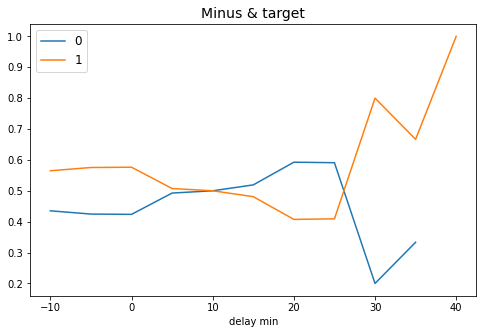

In [ ]:
plt.subplots(figsize = (8,5))

con[0].plot()
con[1].plot()
plt.legend(fontsize = 12)
plt.title('Minus & target', fontsize = 14)
plt.xlabel('delay min')
plt.show()

- 아니 좀 희안하네 minus라는 변수는 출발지연시간-도착지연시간인데 당연히 -라면 좋아해야하는거 아닌가.. 

In [ ]:
con = pd.DataFrame()
M = list(range(min(train['Departure Delay in Minutes']), max(train['Departure Delay in Minutes']),10))
for i in M:
  a = train[train['Departure Delay in Minutes']>=i]['target'].value_counts(normalize = True).to_frame().T
  con = pd.concat([con,a])
con['idx'] = M

con.set_index('idx', inplace = True)
con

,0,1
idx,,
0,0.444000,0.556000
10,0.508314,0.491686
20,0.544068,0.455932
30,0.576923,0.423077
40,0.597101,0.402899
...,...,...
1080,1.000000,NaN
1090,1.000000,NaN
1100,1.000000,NaN


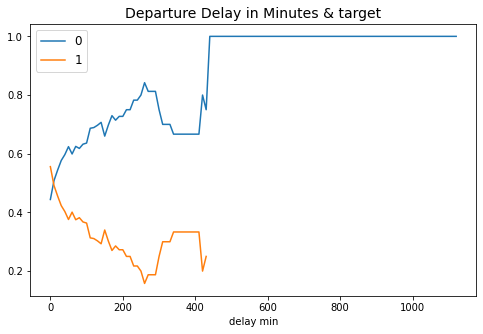

In [ ]:
plt.subplots(figsize = (8,5))

con[0].plot()
con[1].plot()
plt.legend(fontsize = 12)
plt.title('Departure Delay in Minutes & target', fontsize = 14)
plt.xlabel('delay min')
plt.show()

In [ ]:
con = pd.DataFrame()
M = list(range(int(min(train['Arrival Delay in Minutes'])), int(max(train['Arrival Delay in Minutes'])),10))
for i in M:
  a = train[train['Arrival Delay in Minutes']>=i]['target'].value_counts(normalize = True).to_frame().T
  con = pd.concat([con,a])
con['idx'] = M

con.set_index('idx', inplace = True)
con

,0,1
idx,,
0,0.444000,0.556000
10,0.538553,0.461447
20,0.552721,0.447279
30,0.585421,0.414579
40,0.608696,0.391304
...,...,...
1070,1.000000,NaN
1080,1.000000,NaN
1090,1.000000,NaN


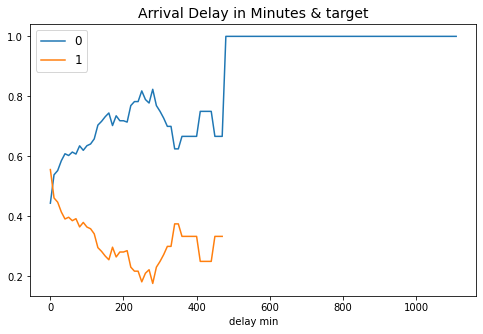

In [ ]:
plt.subplots(figsize = (8,5))

con[0].plot()
con[1].plot()
plt.legend(fontsize = 12)
plt.title('Arrival Delay in Minutes & target', fontsize = 14)
plt.xlabel('delay min')
plt.show()

- 기본적으로 출발과 도착 딜레이시간이 길어지면 0에 해당하는 비율이 올라가는건 사실이다. 하지만 계속 우상향은 아니고 어느 순간에 올라갔다 내려갔다를 반복한다.

- 저 0과 1은 누적된 수치라 확실히 딜레이 시간이 길어지면 1은 감소하는게 보인다.

- 딜레이를 100단위로 쪼개서 feature로 만들면 괜찮을듯하다.

- log정규화나 gussian dist는 안쓸예정이다. 너무 심하게 분포가 치우쳐져있어서 그걸로 해결 안되고 category화 해서 쓰면 괜찮겠다.

- 전처리 과정해서 건드릴 feature는 [Arrival Delay in Minutes, Departure Delay in Minutes, Age]정도가 되겠다.

  ** Flight Distance는 수치형이긴하지만 groupby해서 target으로 묶어보니 크게 차이나지 않아서 그냥 둬도 괜찮을거같다.
  - Age는 로그 정규화 혹은 category화 진행예정
  -  Arrival Delay in Minutes, Departure Delay in Minutes는 categroy화 할 예정이다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


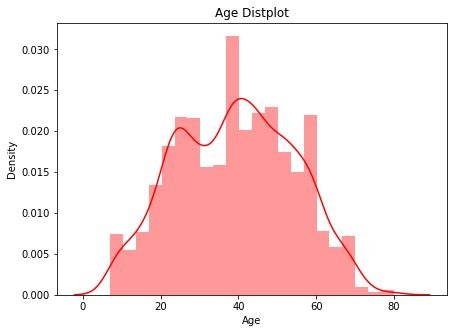

In [ ]:
f, ax = plt.subplots(figsize = (7, 5))
sns.distplot(train['Age'], color = 'red')
plt.title('Age Distplot')
plt.show()

In [ ]:
train['Age_band'] = 0
train['arrive_delay'] = 0
train['departure_delay'] = 0

train.loc[train['Age']<=10, 'Age_band'] = 0
train.loc[train['Departure Delay in Minutes']<=100, 'Departure Delay in Minutes'] = 0
train.loc[train['Arrival Delay in Minutes']<=100, 'Arrival Delay in Minutes'] = 0

for i in range(1, 13):
  train.loc[(train['Age']>i*10) & (train['Age']<=(i*10)+10),'Age_band'] = i
  train.loc[(train['Departure Delay in Minutes']>i*100) & (train['Departure Delay in Minutes']<=(i*100)+100),'departure_delay'] = i
  train.loc[(train['Arrival Delay in Minutes']>i*100) & (train['Arrival Delay in Minutes']<=(i*100)+100),'arrive_delay'] = i

del train['Age']
del train['Departure Delay in Minutes']
del train['Arrival Delay in Minutes']
del train['id']

x = train.copy()
y = train['target']
del x['target']

cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for i in enumerate(cat_features): 
  ca = i[1]
  x[ca] = x[ca].astype('category') 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 12346789)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2250, 23) (2250,)
(750, 23) (750,)


In [ ]:
from sklearn.model_selection import cross_val_score
import lightgbm

#lgbm = lightgbm.LGBMClassifier(boosting_type = 'gbdt',random_state = 123456789, colsample_bytree=0.9, max_depth = 5, subsample=0.9, n_estimators = 300)
lgbm = lightgbm.LGBMClassifier(random_state = 123456789)
scores = cross_val_score(lgbm, x_train, y_train, cv = 5)
print('Average Accuarcy :',np.mean(scores))

Average Accuarcy : 0.9195555555555555


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

lgbm.fit(x_train, y_train)
pred = lgbm.predict(x_test)
print('Accuarcy :', accuracy_score(y_test, pred))
print('*' * 150)
print('\n','Confusion matrix','\n',confusion_matrix(y_test, pred))

Accuarcy : 0.936
******************************************************************************************************************************************************

 Confusion matrix 
 [[300  19]
 [ 29 402]]


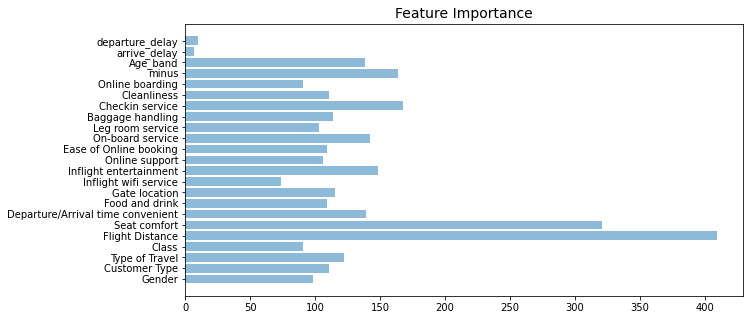

In [ ]:
plt.subplots(figsize = (10,5))
plt.barh(x_train.columns, lgbm.feature_importances_, alpha = 0.5)
plt.title('Feature Importance', fontsize = 14)
plt.show()

In [ ]:
!pip install optuna

from optuna.samplers import TPESampler
import optuna

sampler = TPESampler(seed = 42)

def obj(trial):
  param = {'objective': 'binary',
          'verbose': -1,
          'metric': 'accuarcy', 
          'max_depth': trial.suggest_int('max_depth',3, 15),
          'learning_rate': trial.suggest_loguniform("learning_rate", 1e-5, 1e-2),
          'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
          'min_child_samples': trial.suggest_int('min_child_samples', 5, 20),
          'subsample': trial.suggest_loguniform('subsample', 0.4, 1)}

  lgbm = lightgbm.LGBMClassifier(**param)
  lgbm.fit(x_train, y_train)
  acc = accuracy_score(y_test ,lgbm.predict(x_test))

  return acc

study_lgb = optuna.create_study(direction = 'maximize', sampler = sampler)
study_lgb.optimize(obj, n_trials = 100)

[I 2022-02-19 14:50:18,573] A new study created in memory with name: no-name-8b9f04bf-6df9-4f92-8568-50ae3f809f4d
[I 2022-02-19 14:50:21,347] Trial 0 finished with value: 0.928 and parameters: {'max_depth': 7, 'learning_rate': 0.0071144760093434225, 'n_estimators': 2330, 'min_child_samples': 14, 'subsample': 0.46147273880126555}. Best is trial 0 with value: 0.928.
[I 2022-02-19 14:50:24,065] Trial 1 finished with value: 0.5746666666666667 and parameters: {'max_depth': 5, 'learning_rate': 1.493656855461762e-05, 'n_estimators': 2666, 'min_child_samples': 14, 'subsample': 0.765297684068612}. Best is trial 0 with value: 0.928.
[I 2022-02-19 14:50:25,355] Trial 2 finished with value: 0.916 and parameters: {'max_depth': 3, 'learning_rate': 0.008123245085588688, 'n_estimators': 2581, 'min_child_samples': 8, 'subsample': 0.4725148048142631}. Best is trial 0 with value: 0.928.
[I 2022-02-19 14:50:27,272] Trial 3 finished with value: 0.8253333333333334 and parameters: {'max_depth': 5, 'learning_

In [ ]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 0.9413333333333334,
params {'max_depth': 13, 'learning_rate': 0.006990109362719175, 'n_estimators': 1795, 'min_child_samples': 16, 'subsample': 0.7320748270920473}


In [ ]:
lgbm = lightgbm.LGBMClassifier(**trial_params)

lgbm.fit(x_train, y_train)
pred = lgbm.predict(x_test)
print('Accuarcy :', accuracy_score(y_test, pred))
print('*' * 150)
print('\n','Confusion matrix','\n',confusion_matrix(y_test, pred))

Accuarcy : 0.9413333333333334
******************************************************************************************************************************************************

 Confusion matrix 
 [[300  19]
 [ 25 406]]


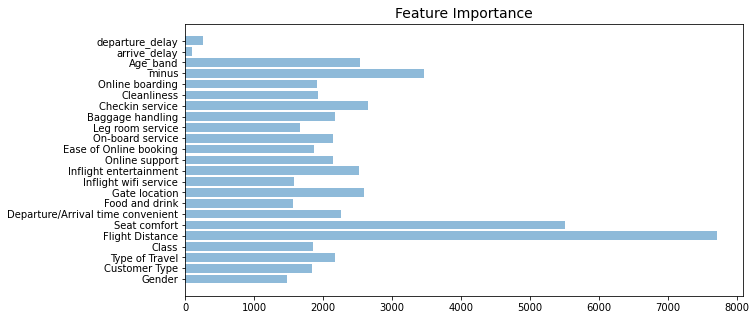

In [ ]:
plt.subplots(figsize = (10,5))
plt.barh(x_train.columns, lgbm.feature_importances_, alpha = 0.5)
plt.title('Feature Importance', fontsize = 14)
plt.show()

- 94%를 넘기는건 쉽지않아보인다. 새로운 feature enginnering이나 앙상블을 통해서 넘을 수 있을듯하다.